# Flight Delays

## Imports and data

In [1]:
import altair as alt
alt.enable_mime_rendering()

In [2]:
flights = alt.load_dataset('flights-5k')

In [3]:
flights.head()

,date,delay,destination,distance,origin
0,2001-01-10 18:20:00,25,HOU,192,SAT
1,2001-01-31 16:45:00,17,OAK,371,SNA
2,2001-02-16 12:07:00,21,SAN,417,SJC
3,2001-02-03 17:00:00,-5,SAN,480,SMF
4,2001-01-02 12:16:00,5,PHX,833,OKC


In [4]:
len(flights)

5000

## Flight delays and distance

Create a visualization that explores the following question:

> Are longer/shorter flights more or less on time?

Keep in mind that there are 5000 observations here. To answer this question will likely require some sort of aggregation so draw out the correlations.

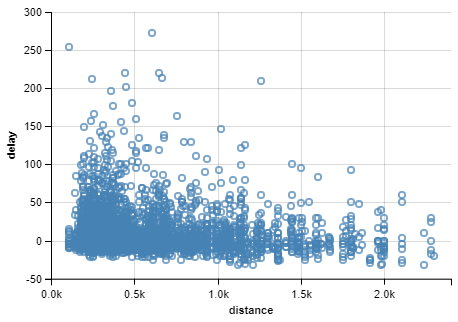

In [5]:
alt.Chart(flights).mark_point().encode(
    alt.X('distance'),
    alt.Y('delay')
)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

There a a lot more recorded short trips, and it seems like the longer a flight, the less likely it is to be late

## Delays over time

Create a visualization that explores the following question:

> How do average flight delays vary with the day of the week in this dataset?

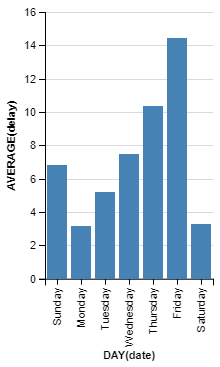

In [6]:
alt.Chart(flights).mark_bar().encode(
    alt.X('date:T', timeUnit = 'day'),
    alt.Y('average(delay)')
)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

Long delays are the most likely to happen on Friday, decreasing as the weekday is earlier, until it's at (at least very close to) the smallest average delay on Monday. Saturday is comparable to Monday in terms of average delays, Sunday is a bit more than them

## Delays by origin and destination

Create a visualization that allows explores the following question:

> Which airports (both origin and detination) have the best and worst average delays?

In creating this visualiztion, there are three variables you need to look at. This means you will need to use at least three encoding channels. Finding the right encoding channels and marks is the challenge here!

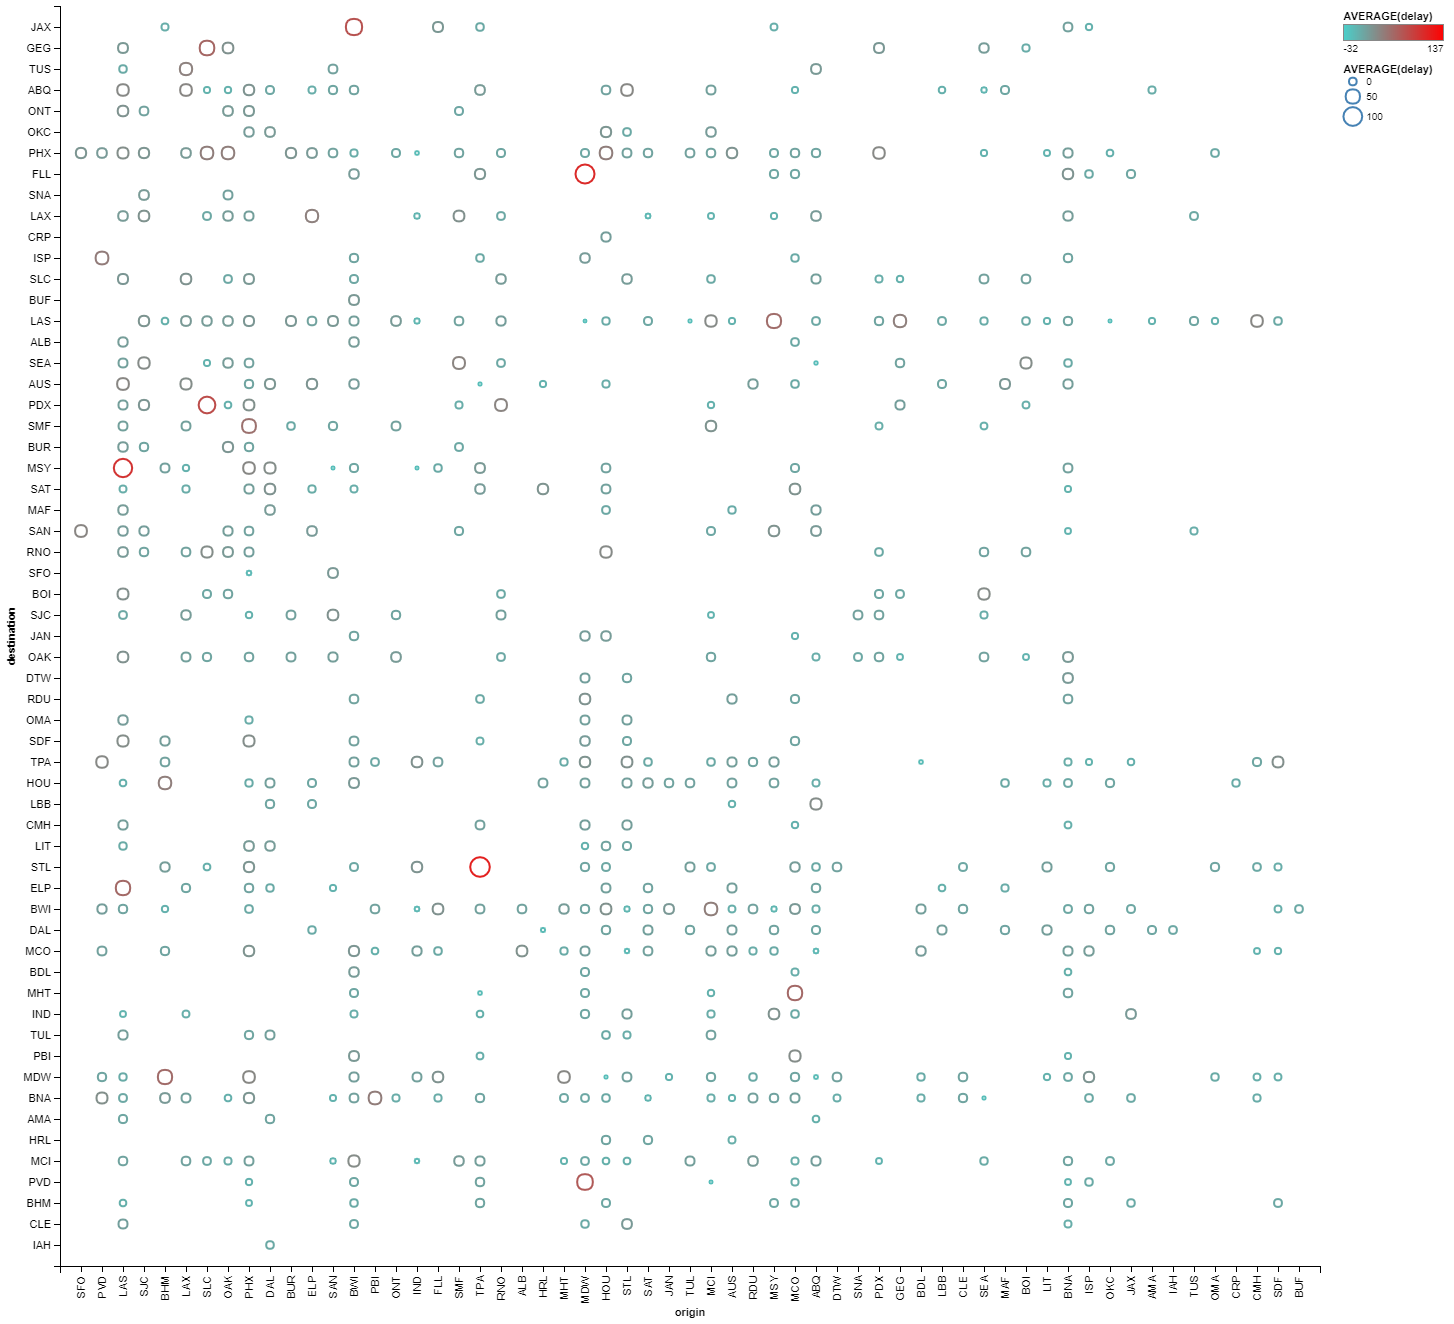

In [7]:
alt.Chart(flights).mark_point().encode(
    alt.X('origin', sort = alt.SortField('delay', 'mean', 'descending')),
    alt.Y('destination', sort = alt.SortField('delay', 'mean', 'descending')),
    alt.Size('average(delay)', scale = alt.Scale(domain = [min(flights['delay'])/2, max(flights['delay'])/2])),
    alt.Color('average(delay)', scale = alt.Scale(domain = [min(flights['delay']), max(flights['delay'])/2], range = ['#48D1CC','#FF0000']))
)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

There are big delays going from:
TPA to STL,
LAS to MSY, and
MDW to FLL.
Owing to the nature of the graph it's very hard to tell if one point was missed, or to compare between similar values.

There are very small delays going from:
MCI to PVD,
SEA to BNA, and
TPA to MHT,
as well as others.